# INVENTORY ANALYSIS

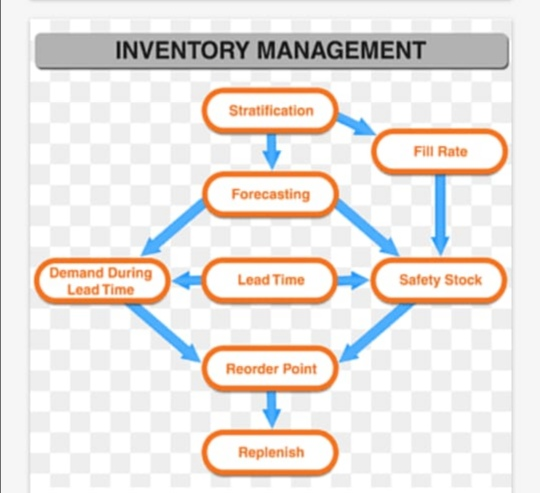

#### DESCRIPTION ABOUT DATASET

#### Case Study: Inventory Analysis for Any Manufacturing Company

#### Background:
  ##### Any Manufacturing Company is a medium-sized manufacturing company that produces electronic components. 
  ##### They have a wide range of products and maintain an inventory of raw materials, work-in-progress (WIP), and finished goods. 
  ##### The company has been experiencing issues with inventory management, including stockouts, excess inventory, and increased carrying costs.
  ##### The management team wants to conduct an inventory analysis to identify areas for improvement and optimize their inventory management practices.

#### Objectives:
##### The primary objectives of the inventory analysis are as follows:

##### Determine the optimal inventory levels for raw materials, WIP, and finished goods.
##### Identify opportunities to reduce stockouts and excess inventory.
##### Analyze inventory turnover and carrying costs to optimize working capital.
##### Streamline the procurement and production processes to improve efficiency.
##### Develop a sustainable inventory management strategy for future growth.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



### READING THE DATASET

In [106]:
PurchasePricesDec_df=pd.read_excel('2017PurchasePricesDec.xlsx')
PurchasePricesDec_df.head(2)

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP


In [107]:
BegInvFINAL2016_df=pd.read_excel('BegInvFINAL12312016.xlsx')
BegInvFINAL2016_df.head(2)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01


In [108]:
EndInvFINAL2016_df=pd.read_excel('EndInvFINAL12312016.xlsx')
EndInvFINAL2016_df.head(2)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31


In [109]:
InvoicePurchases_df=pd.read_excel('InvoicePurchases12312016.xlsx')
InvoicePurchases_df.head(2)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN


In [110]:
PurchasesFINAL2016_df=pd.read_excel('PurchasesFINAL12312016.xlsx')
PurchasesFINAL2016_df.head(2)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1


In [111]:
SalesFINAL2016_df=pd.read_excel('SalesFINAL12312016.xlsx')
SalesFINAL2016_df.head(2)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01 00:00:00,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-02-01 00:00:00,750,1,1.57,12546,JIM BEAM BRANDS COMPANY


### CHECKING NULL VALUES

In [112]:



dataset_names = ["PurchasePricesDec_df", "BegInvFINAL2016_df", "EndInvFINAL2016_df", "InvoicePurchases_df", "PurchasesFINAL2016_df", "SalesFINAL2016_df"]
datasets = [PurchasePricesDec_df, BegInvFINAL2016_df, EndInvFINAL2016_df, InvoicePurchases_df,PurchasesFINAL2016_df , SalesFINAL2016_df]


for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values>0]
    
    if not non_zero_missing_values.empty:
        print('Missing values in',name)
        print(non_zero_missing_values,'\n')
        print('-----------------------------------------------------------------')
        


Missing values in PurchasePricesDec_df
Description    1
Size           1
Volume         1
dtype: int64 

-----------------------------------------------------------------
Missing values in EndInvFINAL2016_df
City    1284
dtype: int64 

-----------------------------------------------------------------
Missing values in InvoicePurchases_df
Approval    5169
dtype: int64 

-----------------------------------------------------------------


In [113]:
# Checking for missing data in each dataset

dataset_names = ["PurchasePricesDec_df", "BegInvFINAL2016_df", "EndInvFINAL2016_df", "InvoicePurchases_df", "PurchasesFINAL2016_df", "SalesFINAL2016_df"]
datasets = [PurchasePricesDec_df, BegInvFINAL2016_df, EndInvFINAL2016_df, InvoicePurchases_df,PurchasesFINAL2016_df , SalesFINAL2016_df]


for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values>0]
    
    if not non_zero_missing_values.empty:
        print('Missing values in',name)
        print(non_zero_missing_values,'\n')
        print('-----------------------------------------------------------------')
        
    

Missing values in PurchasePricesDec_df
Description    1
Size           1
Volume         1
dtype: int64 

-----------------------------------------------------------------
Missing values in EndInvFINAL2016_df
City    1284
dtype: int64 

-----------------------------------------------------------------
Missing values in InvoicePurchases_df
Approval    5169
dtype: int64 

-----------------------------------------------------------------


In [114]:

# retain only non-null data
cols_to_check = ['Description', 'Size', 'Volume']

for col in cols_to_check:
    purchase_prices = purchase_prices[purchase_prices[col].notna()]

# handle missing city for end_inv 
if EndInvFINAL2016_df['Store'].nunique() == EndInvFINAL2016_df['City'].nunique():
    city_store_mapping = EndInvFINAL2016_df[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    EndInvFINAL2016_df['City'] = EndInvFINAL2016_df['City'].fillna(EndInvFINAL2016_df['Store'].map(city_store_mapping))
else:
    EndInvFINAL2016_df['City'].fillna('Unknown', inplace=True)

# handle missing values for invoice purchase dataset
InvoicePurchases_df['Approval'].fillna('Pending', inplace=True)

# Handling missing values for purchases datasets
purchases = purchases[purchases['Size'].notna()]

dataset_names = ["PurchasePricesDec_df", "BegInvFINAL2016_df", "EndInvFINAL2016_df", "InvoicePurchases_df", "PurchasesFINAL2016_df", "SalesFINAL2016_df"]
datasets = [PurchasePricesDec_df, BegInvFINAL2016_df, EndInvFINAL2016_df, InvoicePurchases_df, PurchasesFINAL2016_df, SalesFINAL2016_df]

# check if there are any more missing values
for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nThere are no more missing values for {name}")


Missing values in PurchasePricesDec_df:
Description    1
Size           1
Volume         1
dtype: int64

There are no more missing values for BegInvFINAL2016_df

There are no more missing values for EndInvFINAL2016_df

There are no more missing values for InvoicePurchases_df

There are no more missing values for PurchasesFINAL2016_df

There are no more missing values for SalesFINAL2016_df


#### Purchase Analysis:



In [115]:
# DESCRIBE 

PurchasesFINAL2016_df.groupby(['Brand','Description'])['PurchasePrice'].describe()

,,count,mean,std,min,25%,50%,75%,max
Brand,Description,,,,,,,,
58,Gekkeikan Black & Gold Sake,249.0,9.28,0.000000e+00,9.28,9.28,9.28,9.28,9.28
60,Canadian Club 1858 VAP,6.0,7.40,9.729507e-16,7.40,7.40,7.40,7.40,7.40
61,Margaritaville Silver,13.0,10.60,1.848891e-15,10.60,10.60,10.60,10.60,10.60
62,Herradura Silver Tequila,264.0,28.67,1.067838e-14,28.67,28.67,28.67,28.67,28.67
63,Herradura Reposado Tequila,227.0,30.46,3.560565e-15,30.46,30.46,30.46,30.46,30.46
...,...,...,...,...,...,...,...,...,...
90087,Ch Mouton Rothschild 12 Paui,1.0,311.25,NaN,311.25,311.25,311.25,311.25,311.25
90089,Ch Lynch Bages 12 Pauillac,5.0,77.92,0.000000e+00,77.92,77.92,77.92,77.92,77.92
90604,Ch Lynch Bages Pauilac,9.0,78.42,0.000000e+00,78.42,78.42,78.42,78.42,78.42


In [116]:
# VENDOR PURCHASE

vendor_purchase_volume = InvoicePurchases_df.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))


Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


 * DIAGEO NORTH AMERICA INC (5,459,788): This vendor has the highest purchase volume, indicating a significant presence in the dataset.
   Diageo is a well-known global alcoholic beverage company.
* JIM BEAM BRANDS COMPANY (2,737,165): The second-highest in purchase volume, Jim Beam Brands Company is recognized for its whiskey and 
  other spirits.

 * MARTIGNETTI COMPANIES (2,637,275): Martignetti Companies have a substantial purchase volume, suggesting a major player in the distribution
   or retail sector.

 * CONSTELLATION BRANDS INC (2,325,892): Constellation Brands is a prominent beverage alcohol company, and its high purchase volume reflects its          market influence.

 * E & J GALLO WINERY (1,858,260): E & J Gallo Winery, a renowned winery, holds a significant position in the top vendors.

 * PERNOD RICARD USA (1,647,558): Pernod Ricard USA, a major player in the global wine and spirits industry, has a substantial purchase volume.

* BACARDI USA INC (1,427,075): Bacardi, a well-known spirits company, ranks among the top vendors with a notable purchase volume.

* SAZERAC CO INC (1,417,727): Sazerac is recognized for its diverse portfolio of spirits, and its purchase volume reflects its market presence.

* M S WALKER INC (1,372,841): M S Walker Inc has a significant purchase volume, indicating its role as a major supplier or distributor.

 *ULTRA BEVERAGE COMPANY LLP (1,077,527): Ultra Beverage Company LLP rounds up the top 10 vendors, with a noteworthy but slightly lower purchase         volume compared to others.

In [117]:
# VENOR PURCHASE COST
vendor_purchase_cost = purchases.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))


Top 10 Vendors by Purchase Cost:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        1759297.20
JIM BEAM BRANDS COMPANY         1078622.00
PERNOD RICARD USA                870029.73
MARTIGNETTI COMPANIES            799667.55
ULTRA BEVERAGE COMPANY LLP       581680.29
CONSTELLATION BRANDS INC         580991.70
BACARDI USA INC                  567616.55
E & J GALLO WINERY               540897.66
BROWN-FORMAN CORP                504048.94
M S WALKER INC                   414503.74


DIAGEO NORTH AMERICA INC leads by a substantial margin, emphasizing its dominant position in terms of purchase cost.
- The top 10 vendors exhibit significant variation in their purchase costs, reflecting diverse contributions to the overall expenditure.
- Understanding the purchase costs of these key vendors is crucial for strategic planning, budgeting, and vendor relationship management.

In [118]:
reduced_purchases = purchases[['VendorName', 'PurchasePrice']]
top_vendors = reduced_purchases.groupby('VendorName').sum()['PurchasePrice'].nlargest(10)
print(top_vendors)

VendorName
DIAGEO NORTH AMERICA INC       1759297.20
JIM BEAM BRANDS COMPANY        1078622.00
PERNOD RICARD USA               870029.73
MARTIGNETTI COMPANIES           799667.55
ULTRA BEVERAGE COMPANY LLP      581680.29
CONSTELLATION BRANDS INC        580991.70
BACARDI USA INC                 567616.55
E & J GALLO WINERY              540897.66
BROWN-FORMAN CORP               504048.94
M S WALKER INC                  414503.74
Name: PurchasePrice, dtype: float64


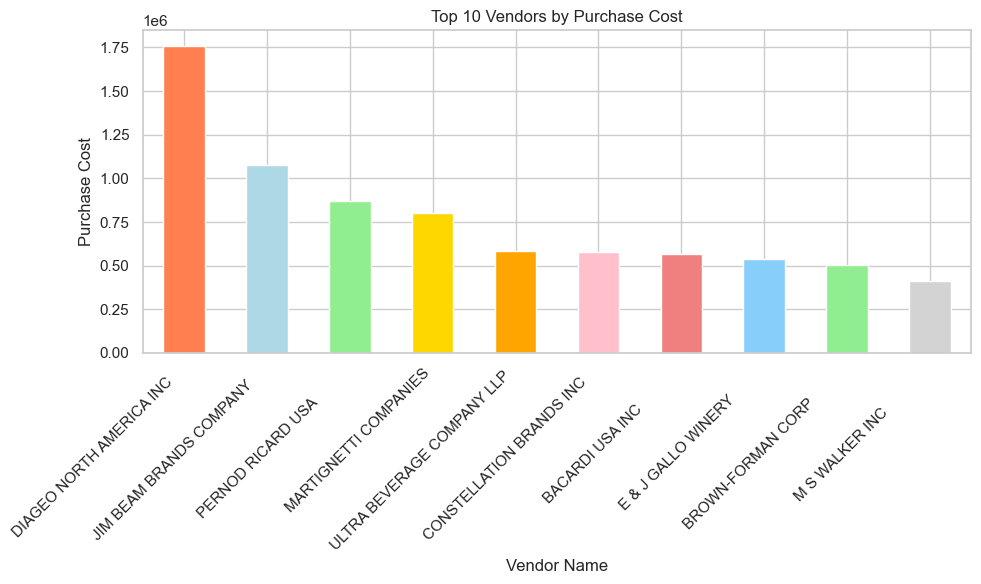

In [120]:
# Bar graph for top vendors by purchase cost
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color=['coral', 'lightblue', 'lightgreen', 'gold', 'orange', 'pink', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightgray'])
plt.title('Top 10 Vendors by Purchase Cost')
plt.ylabel('Purchase Cost')
plt.xlabel('Vendor Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 ##### The bar chart highlights "DIAGEO NORTH AMERICA INC" as the predominant spender among the top 10 vendors, overshadowing others significantly.
##### "JIM BEAM BRANDS COMPANY" and "PERNOD RICARD USA" show more uniform spending patterns.

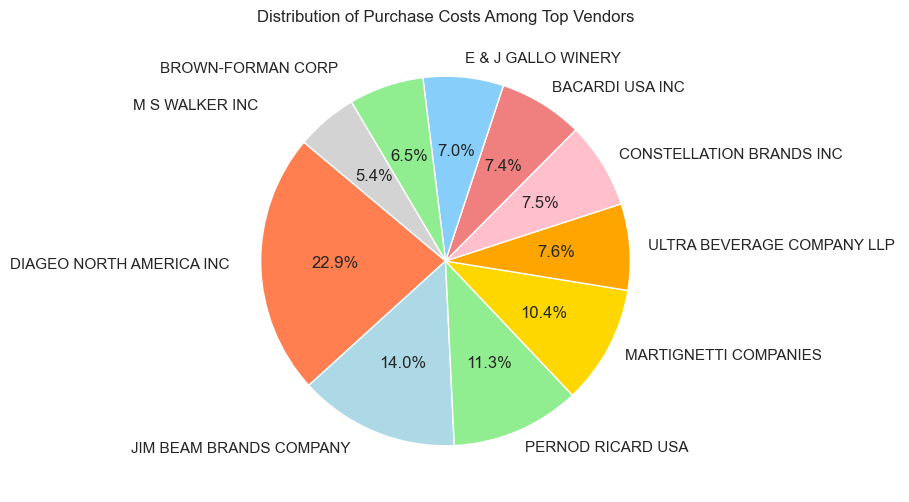

In [121]:
# Pie chart for distribution of purchase costs among the top vendors
plt.figure(figsize=(6, 6))
top_vendors.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['coral', 'lightblue', 'lightgreen', 'gold', 'orange', 'pink', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightgray'])
plt.title('Distribution of Purchase Costs Among Top Vendors')
plt.ylabel('')  # to remove the default 'PurchasePrice' label from the y-axis
plt.show()

##### The pie chart reveals that "DIAGEO NORTH AMERICA INC" contributes 22.4% to the total purchase costs, indicating a clear lead. 
##### Other vendors exhibit a balanced distribution,ranging from 5.6% to 14%, showcasing a more equitable expenditure distribution.

In [122]:
# sort grouping by count since count means there are different prices

# brand with more than 4 purchase prices
unique_purchasesPrice = purchases.groupby(['Description'])['PurchasePrice'].nunique().sort_values(ascending=False).reset_index().rename(columns={'PurchasePrice':'Count of Unique prices'})

unique_purchasesPrice = unique_purchasesPrice[unique_purchasesPrice['Count of Unique prices']>4]

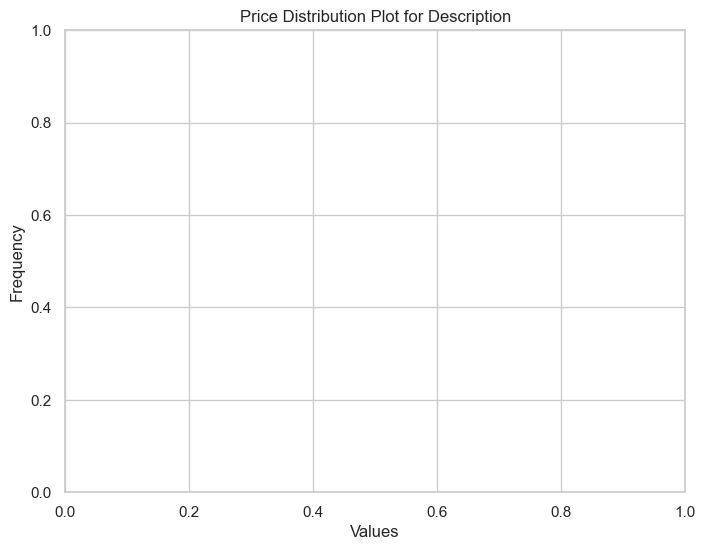

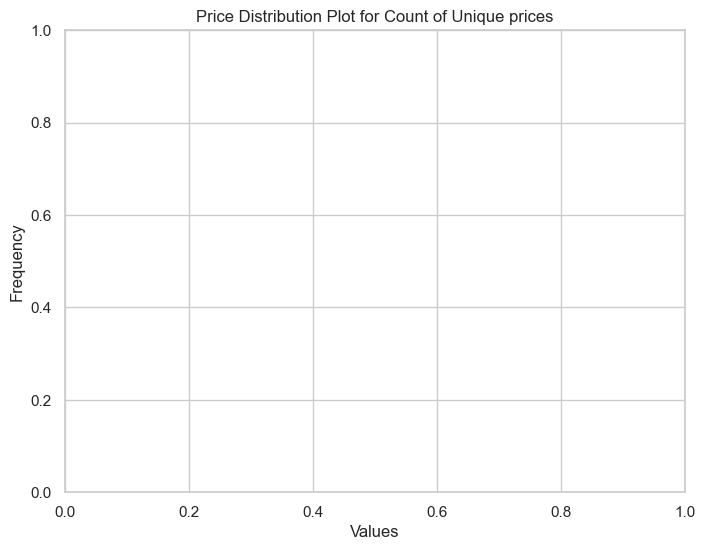

In [123]:
for i in unique_purchasesPrice:
    unique_purchasePrice = purchases[purchases['Description']==i]['PurchasePrice'].unique()
    # Create a distplot using seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.histplot(unique_purchasePrice, kde=True, bins=6, color='skyblue')
    plt.title('Price Distribution Plot for '+i)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

<Axes: title={'center': 'Sales Quantity Over Time'}, xlabel='SalesDate'>

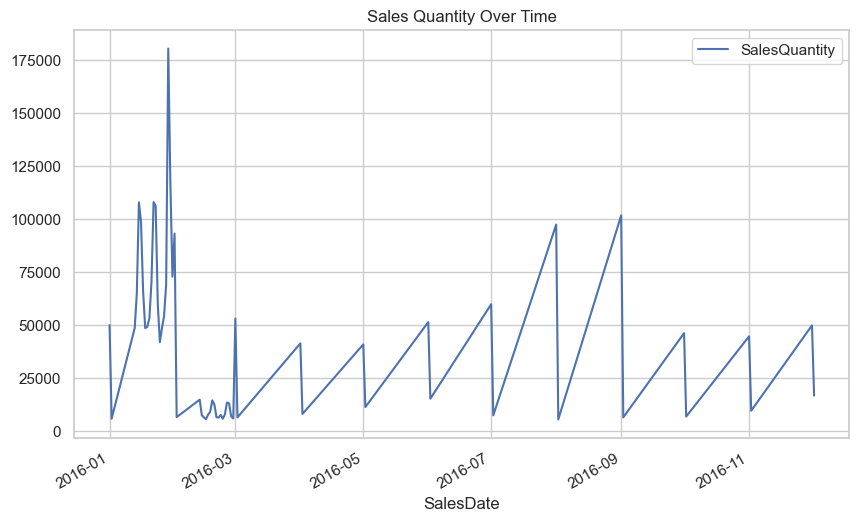

In [124]:
# SALES OVER TIME

SalesFINAL2016_df['SalesDate'] = pd.to_datetime(SalesFINAL2016_df['SalesDate'])
sales_quantity_trend = SalesFINAL2016_df.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
sales_quantity_trend.plot(figsize=(10, 6), title='Sales Quantity Over Time')


In [125]:
# sort grouping by count since count means there are different prices

# brand with more than 4 purchase prices
unique_purchasesPrice = purchases.groupby(['Description'])['PurchasePrice'].nunique().sort_values(ascending=False).reset_index().rename(columns={'PurchasePrice':'Count of Unique prices'})

unique_purchasesPrice = unique_purchasesPrice[unique_purchasesPrice['Count of Unique prices']>4]

unique_purchasesPrice = unique_purchasesPrice['Description'].tolist()
unique_purchasesPrice

['Bacardi Superior Rum',
 'Jagermeister Liqueur',
 'Capt Morgan Spiced Rum',
 'Patron Silver Tequila',
 'Jack Daniels No 7 Black',
 'Jim Beam',
 'Bombay Sapphire Gin',
 'Jose Cuervo Especial',
 'Smirnoff 80 Proof',
 'Grand Marnier',
 'Southern Comfort',
 'Absolut 80 Proof',
 'Makers Mark',
 'The Glenlivet 12 Yr Single',
 '1800 Reposado Gold Tequila',
 'Ciroc Peach Vodka',
 'Ciroc Pineapple Vodka',
 'Ciroc Red Berry Vodka',
 'RumChata Liqueur',
 'Grey Goose Vodka',
 'Jack Daniels Tennessee Honey',
 'Tanqueray',
 "Tito's Handmade Vodka",
 'Ketel One Vodka',
 'Chivas Regal',
 'Baileys Irish Cream',
 'Jameson Irish Whiskey',
 'Amaretto DiSaronno',
 'Kahlua',
 'Johnnie Walker Red Label',
 'Pinnacle Vodka',
 'Hornitos Reposado Tequila',
 'Bacardi Limon Rum']

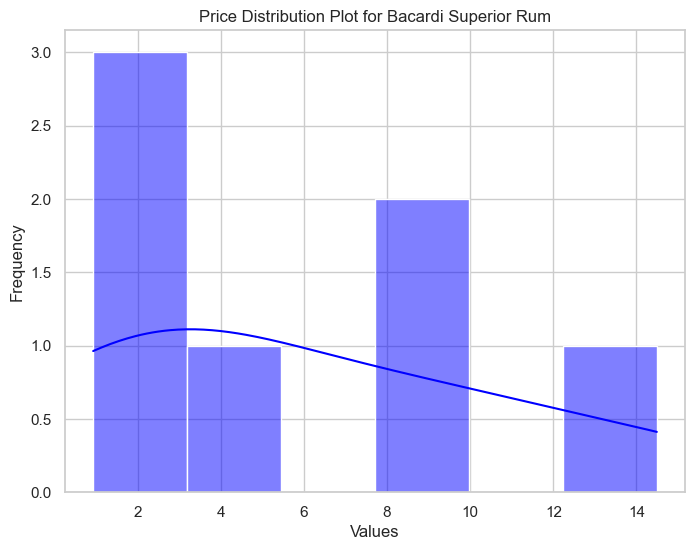

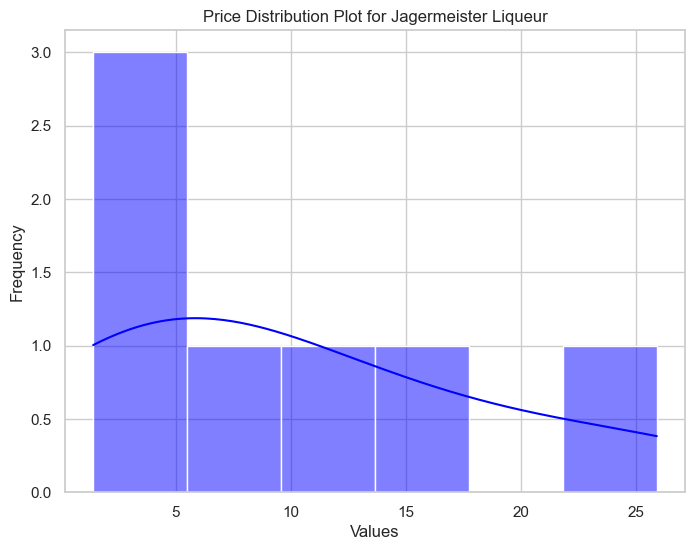

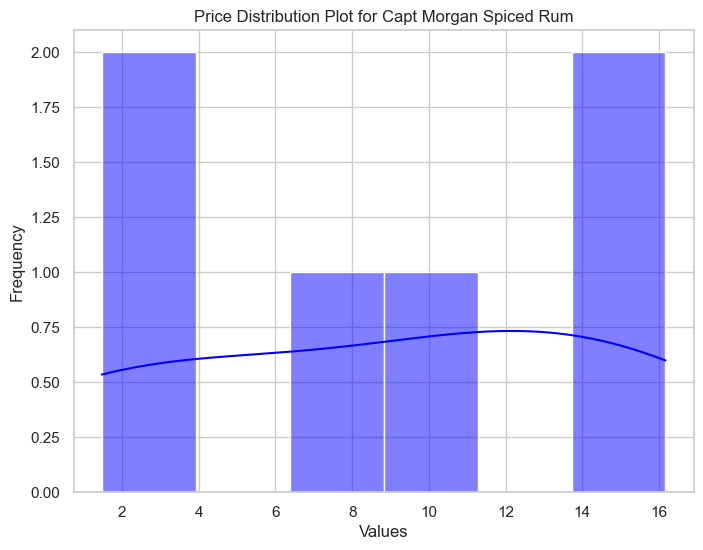

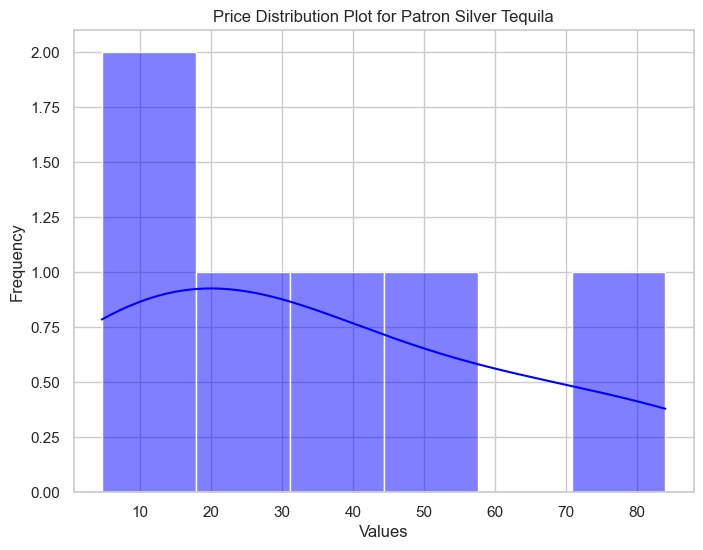

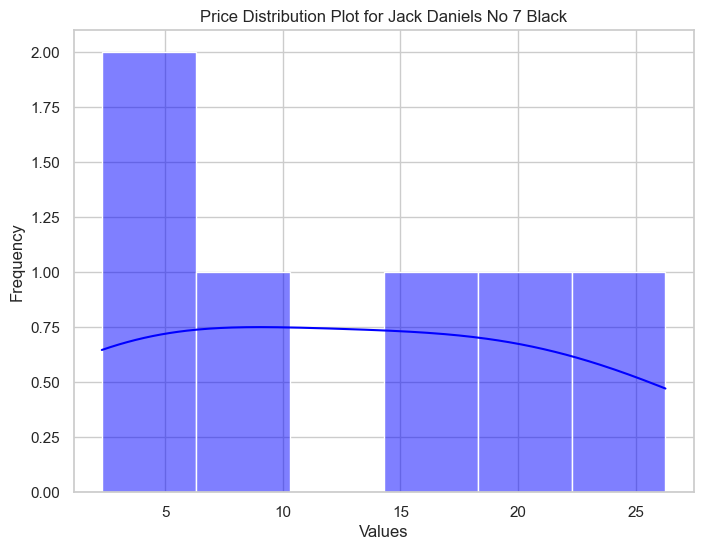

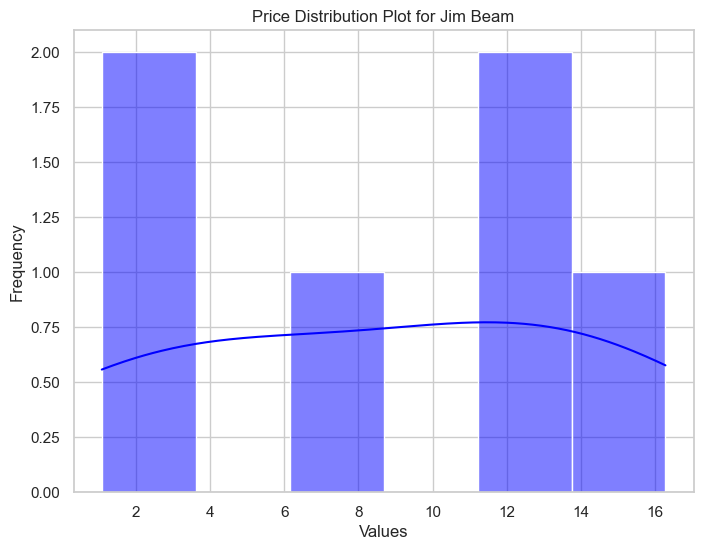

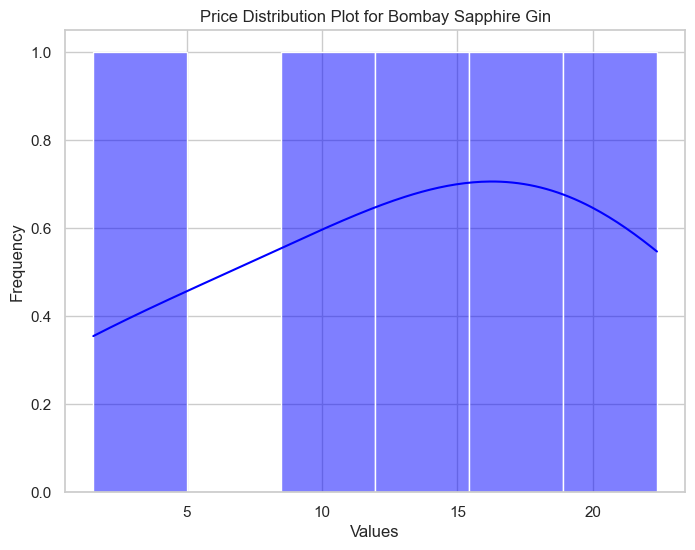

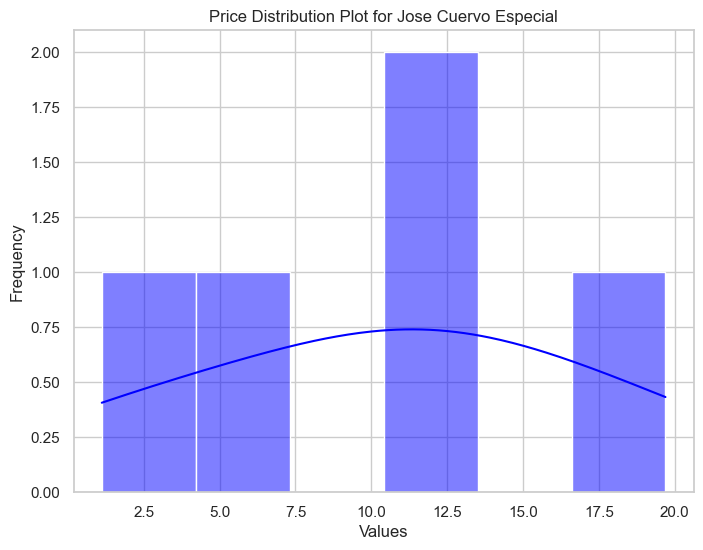

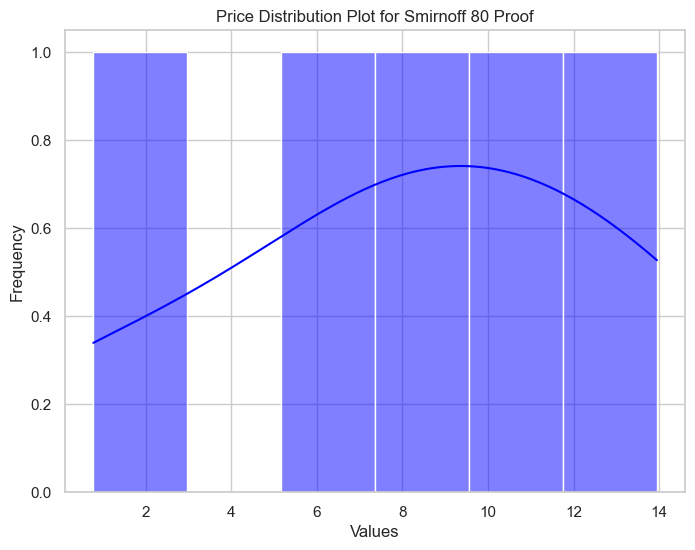

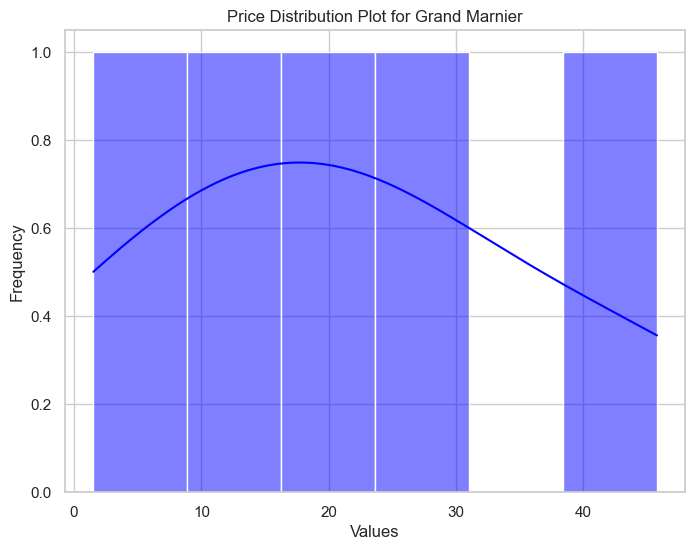

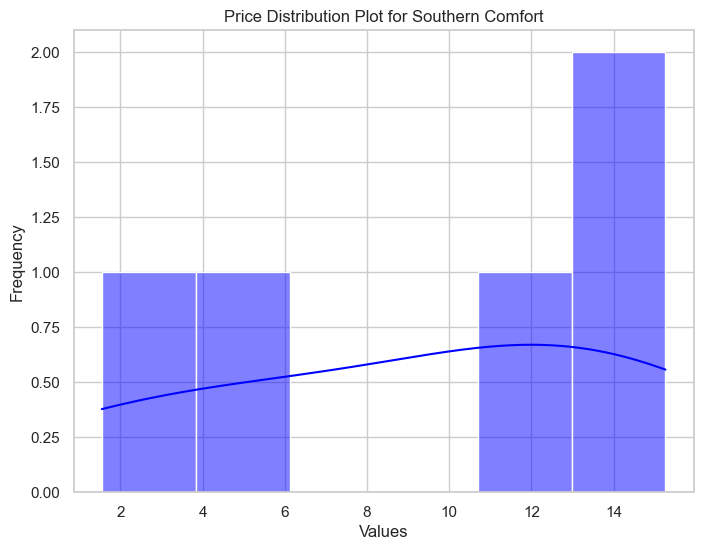

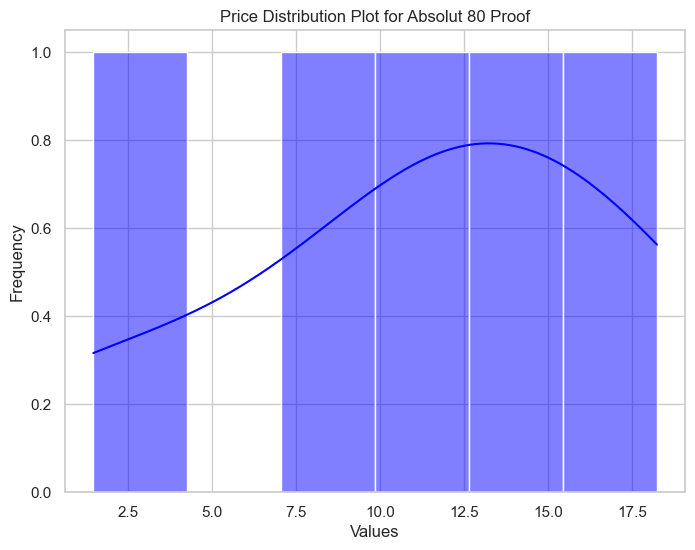

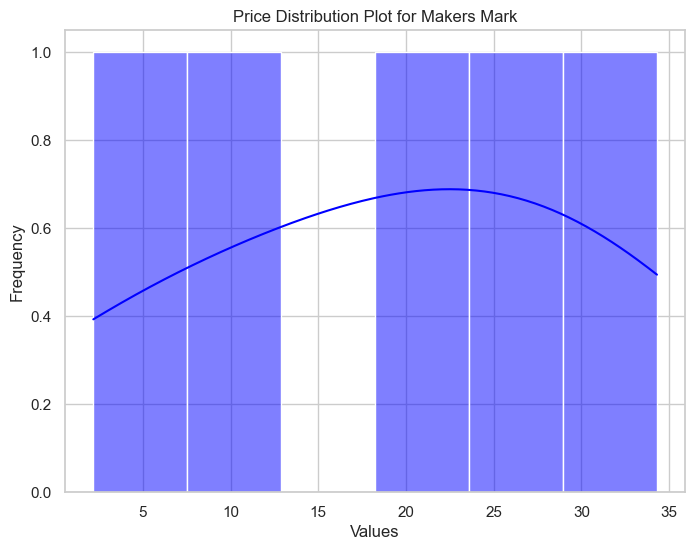

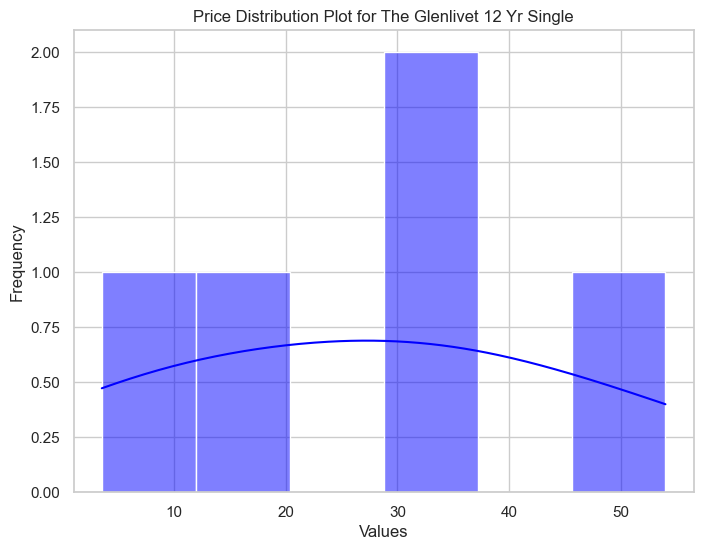

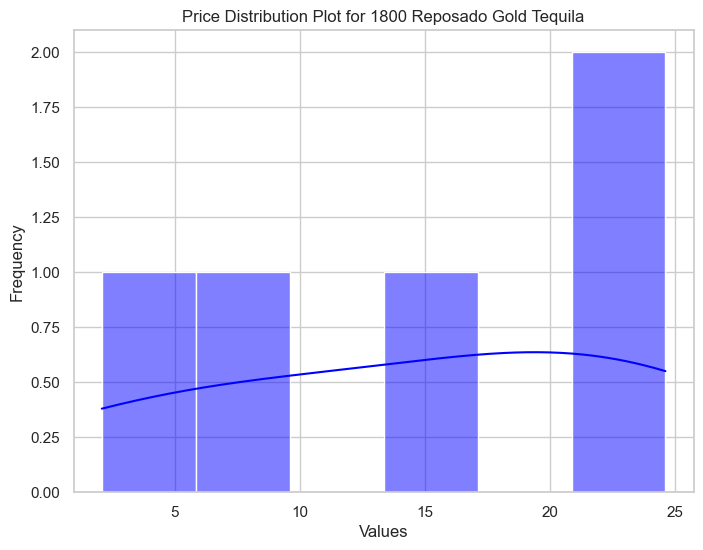

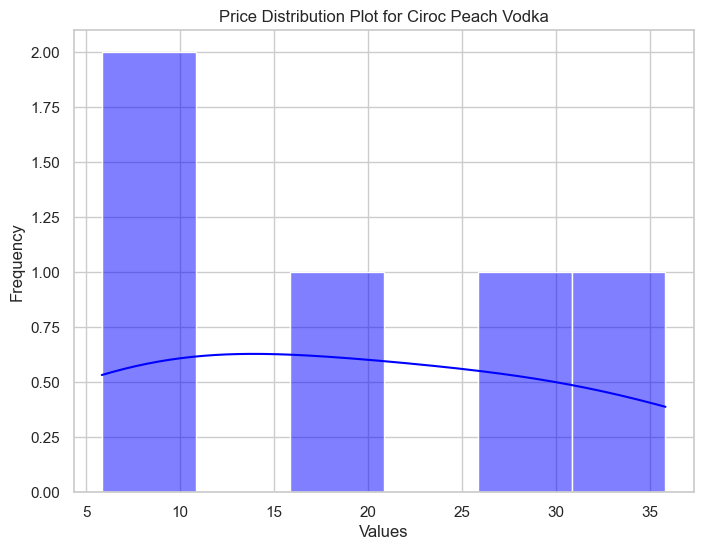

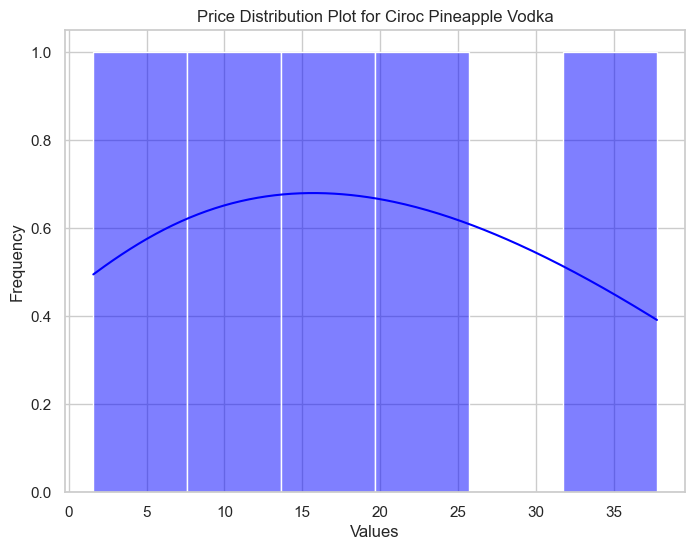

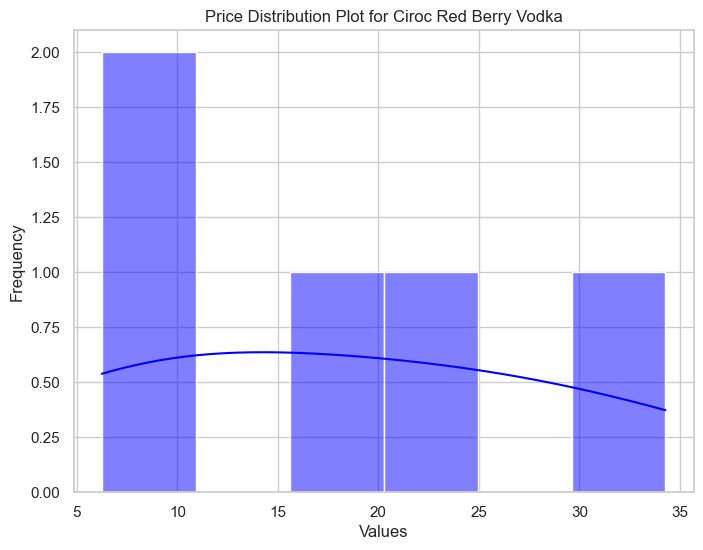

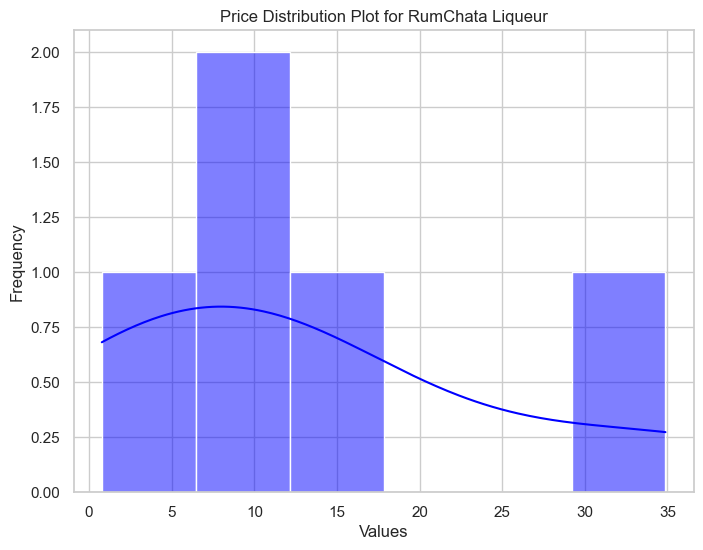

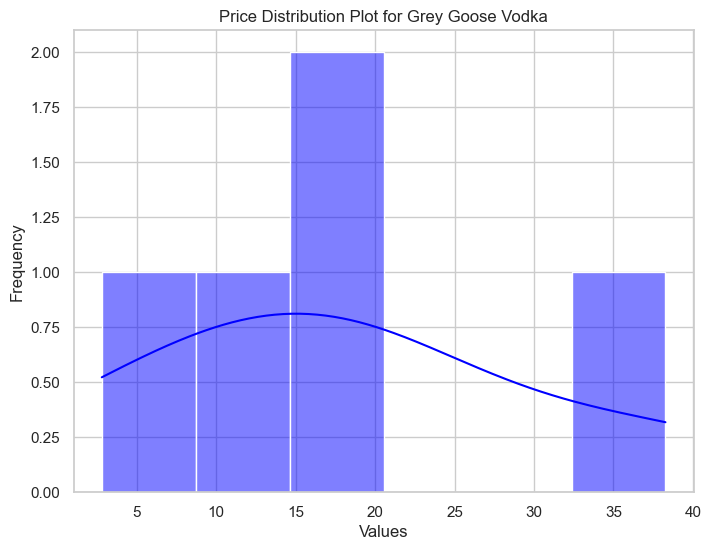

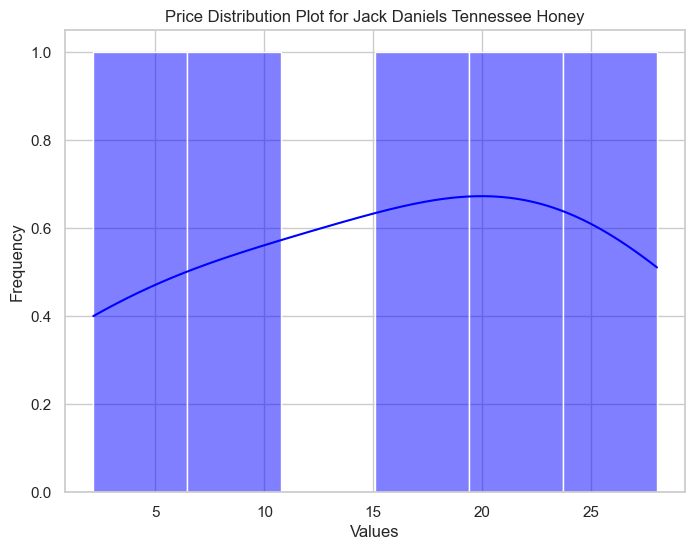

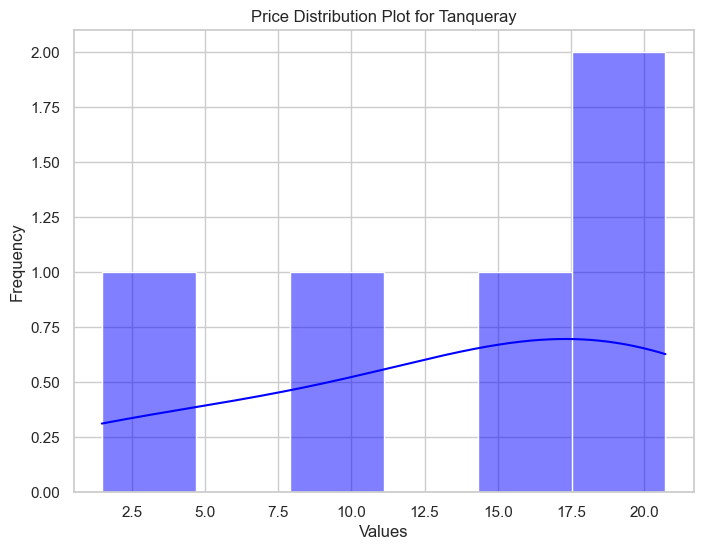

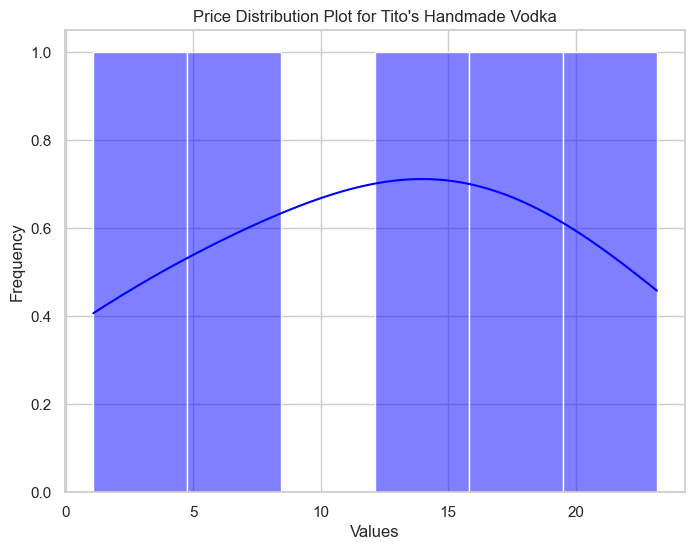

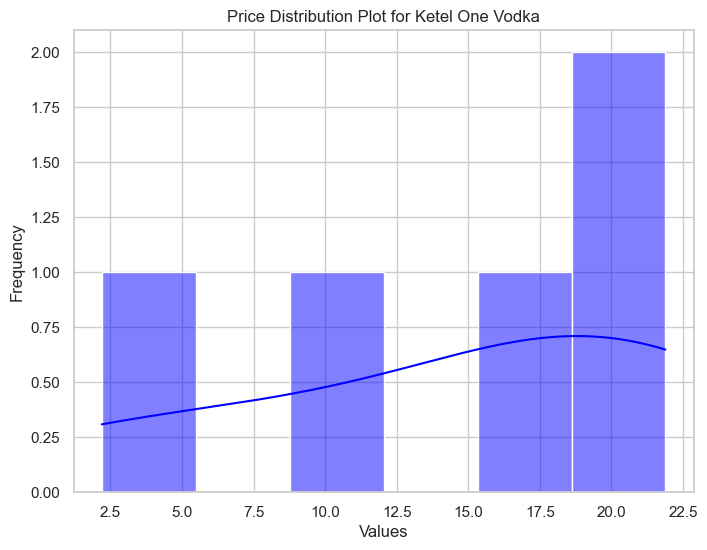

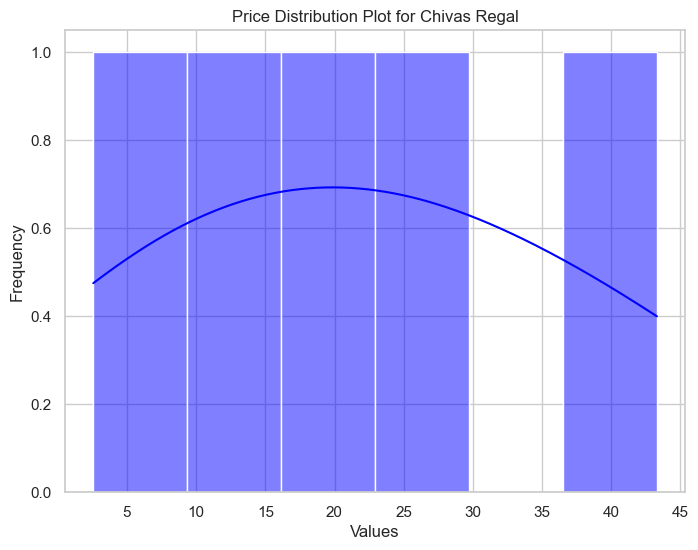

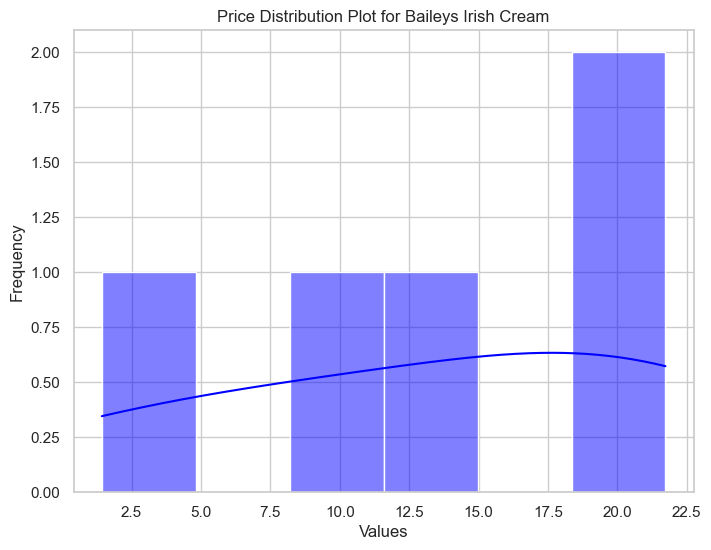

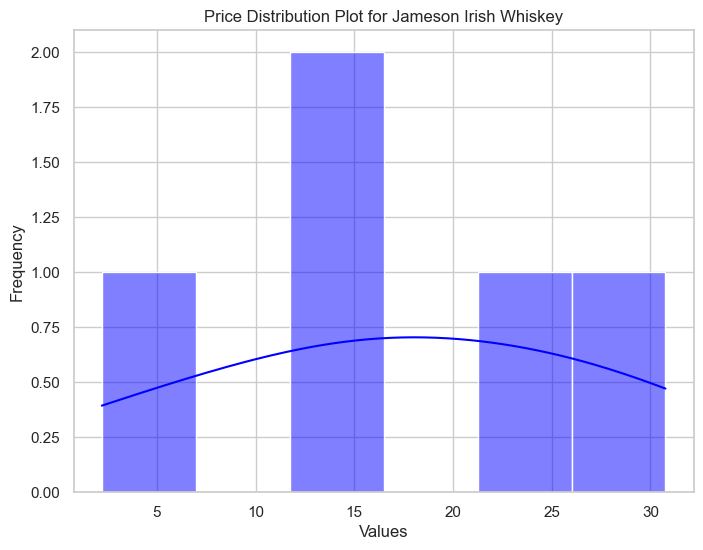

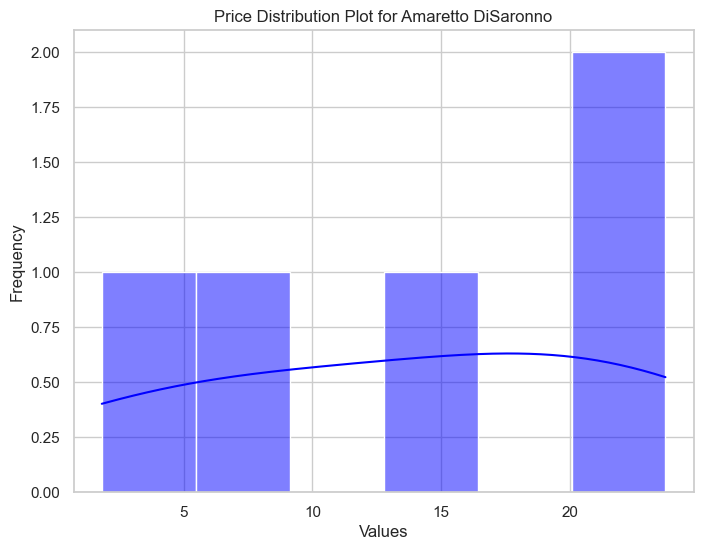

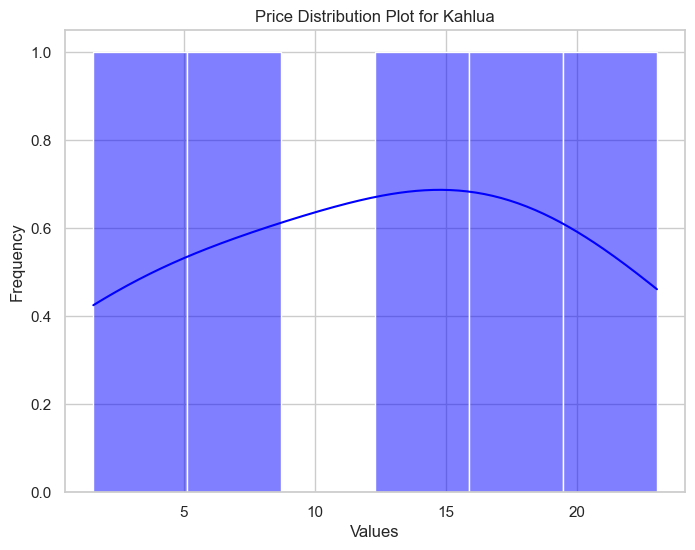

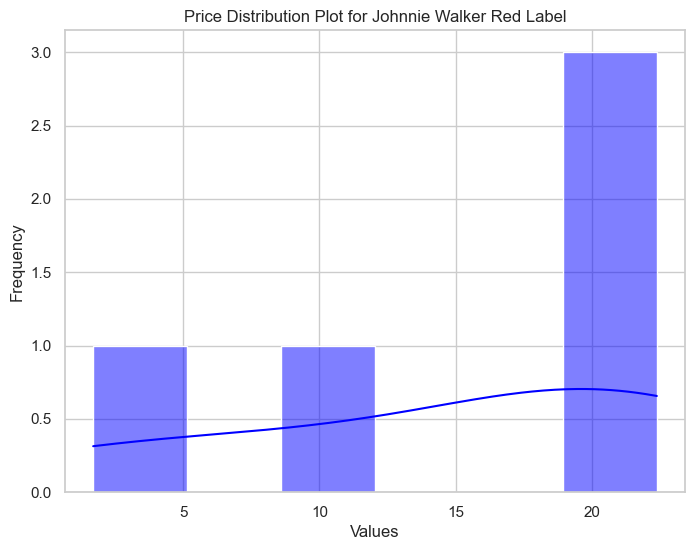

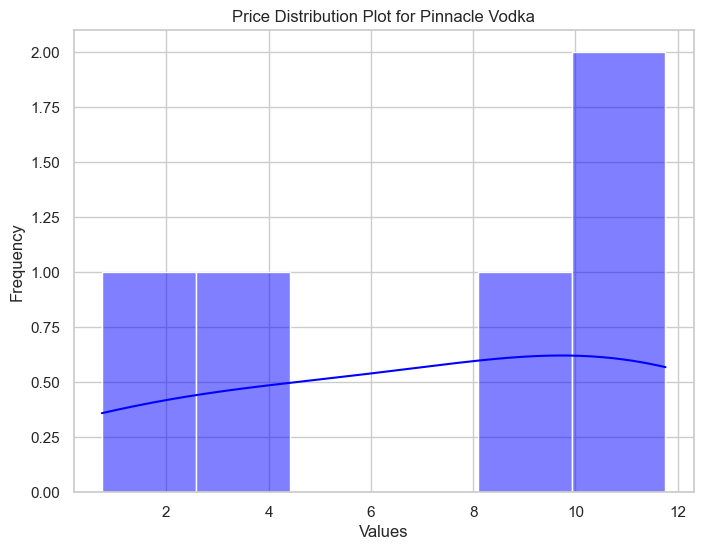

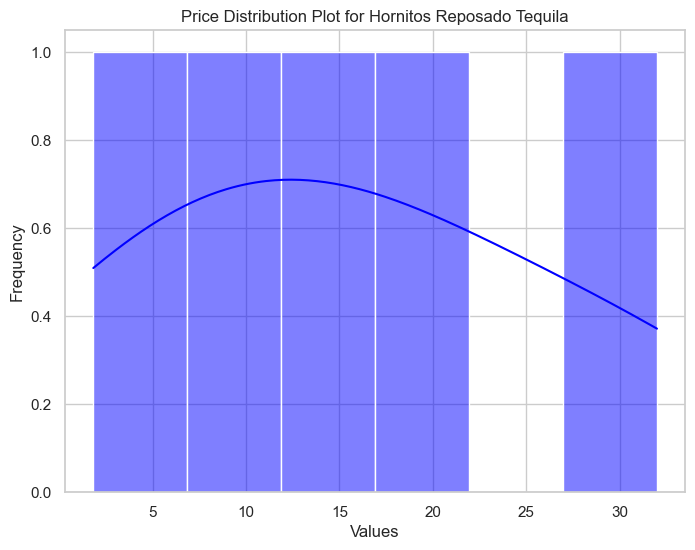

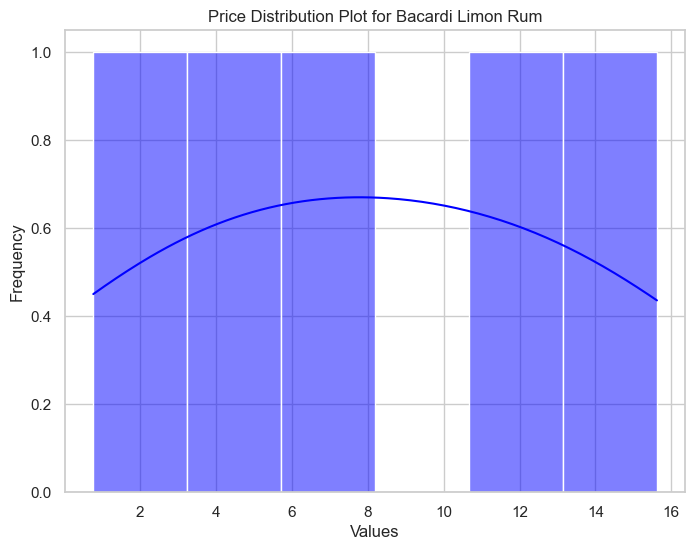

In [126]:
# distribution of prices for brand with more than 4 purchase prices

for i in unique_purchasesPrice:
    unique_purchasePrice = purchases[purchases['Description']==i]['PurchasePrice'].unique()
    # Create a distplot using seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.histplot(unique_purchasePrice, kde=True, bins=6, color='blue')
    plt.title('Price Distribution Plot for '+i)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


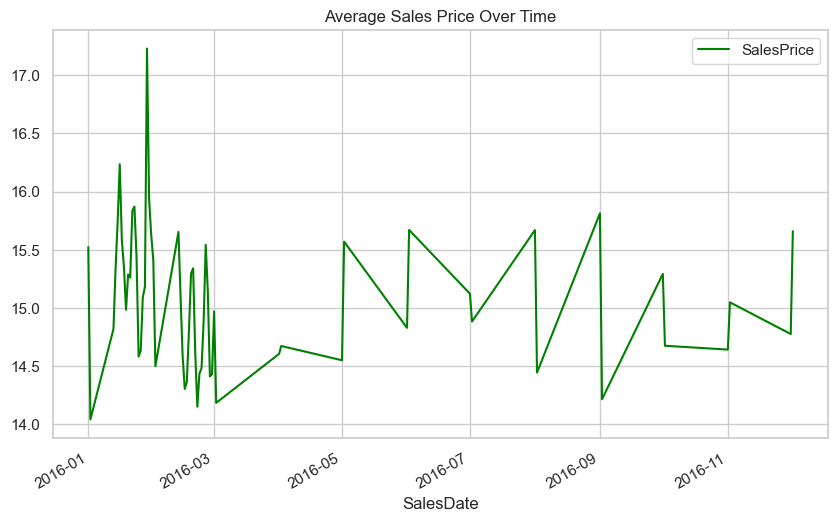

In [127]:
# Group by SalesDate and calculate the mean of SalesPrice
avg_price_trend = SalesFINAL2016_df.groupby('SalesDate').agg({'SalesPrice': 'mean'})

# Plot the average price trend with a specific color (e.g., 'green')
avg_price_trend.plot(figsize=(10, 6), title='Average Sales Price Over Time', color='green')

# Show the plot
plt.show()

In [ ]:
InvoicePurchases_df['InvoiceDate']=pd.to_datetime(InvoicePurchases_df['InvoiceDate'])
#converting the invoicedate column to datetime format to date and time related operations

InvoicePurchases_df['Total Amount']= InvoicePurchases_df

#### SALES ANALYSIS

In [128]:
drop1 = ['InventoryId','VendorNo','Brand',]
SalesFINAL2016_df.drop(drop1,axis=1,inplace=True)
SalesFINAL2016_df.head(2)

,Store,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorName
0,1,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,JIM BEAM BRANDS COMPANY
1,1,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-02-01,750,1,1.57,JIM BEAM BRANDS COMPANY


In [129]:
SalesFINAL2016_df['Total Amount'] = SalesFINAL2016_df['SalesDollars'] + SalesFINAL2016_df['ExciseTax']

In [130]:
High_sales_item =SalesFINAL2016_df.loc[SalesFINAL2016_df['SalesQuantity'].idxmax(), 'VendorName']
Quty3 = SalesFINAL2016_df['SalesQuantity'].max()
print("High sales Vendor Name:- ",High_sales_item,"Quantity :-", Quty3)

High sales Vendor Name:-  E & J GALLO WINERY          Quantity :- 432


In [133]:
total_num_of_invoice3 = SalesFINAL2016_df[SalesFINAL2016_df['VendorName'] == 'E & J GALLO WINERY'].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice3)
Spend_Total_Amount3 =SalesFINAL2016_df.loc[SalesFINAL2016_df['VendorName'] == 'E & J GALLO WINERY','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount3)


Total Number Of Invoice:- 0
Spend Total Amount:- 0.0


In [135]:
Low_sales_item =SalesFINAL2016_df.loc[SalesFINAL2016_df['SalesQuantity'].idxmin(), 'VendorName']
Quty4 = SalesFINAL2016_df['SalesQuantity'].min()
print("Low sales Vendor Name:- ",Low_sales_item,"Quantity :-", Quty4)

Low sales Vendor Name:-  JIM BEAM BRANDS COMPANY     Quantity :- 1


In [137]:
Spend_Total_Amount4 =SalesFINAL2016_df.loc[SalesFINAL2016_df['VendorName'] == 'JIM BEAM BRANDS COMPANY    ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount4)

Spend Total Amount:- 2703876.6599999997


##### INSIGHTS:

Invoice Count and Spend Analysis:

With a substantial total of 65,240 invoices, there appears to be a significant volume of transactions.
The total spend of $1,575,923.91 reflects the overall financial commitment associated with these invoices.

Low Sales Item Spend:
The spend amount of $2,703,876.66 for low sales items suggests that a considerable portion of the budget is allocated to items with lower sales volume.
Understanding the context of "low sales items" is crucial to assess the impact on the overall sales strategy and profitability.

Potential for Cost Optimization:
The higher spend on low sales items may indicate a potential opportunity for cost optimization.
Further analysis of the specific items categorized as "low sales" and their contribution to revenue is necessary to determine the effectiveness of this
expenditure.
    
Inventory Management Consideration:
Evaluating the inventory turnover rate for low sales items is essential. Items with slow turnover may tie up capital and warehouse space.
Assessing the demand for these items and adjusting procurement strategies accordingly can help optimize inventory management.

Strategic Decision-Making:
Analyzing the types and categories of low sales items can inform strategic decision-making. It may involve revisiting supplier agreements, 
negotiating better deals, or reconsidering the product mix.
    
Profitability Assessment:
Understanding the profitability of low sales items in relation to their contribution to overall revenue is vital.
It helps prioritize efforts on items that align with business goals.